In [5]:
import h5py
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
#file = '/allen/programs/celltypes/workgroups/rnaseqanalysis/lydian/mfish/mouse_3/registered/cells_for_visualization.h5'
file = 'cells_for_visualization.h5'
viz = h5py.File( file, 'r')
v_obs = viz['obs']
v_obs.keys()

<KeysViewHDF5 ['Level1_id_label', 'Level2_id_label', '__categories', '_index', 'bin_flat_index', 'clean_region_label', 'cluster_label', 'specimen_x', 'specimen_y', 'specimen_z']>

In [4]:
# filter for cells of a certain type
ftype = 'Level1_id_label'
fclass = '6 CNU GABA'

fdf = pd.DataFrame(v_obs['__categories'][ftype], columns=['fclass'])
fdf['findex'] = range(len(fdf))
fdf.set_index('fclass', inplace=True)

findex = fdf.loc[fclass,'findex']

In [4]:
pred1 = (v_obs['mapped'][:] != 0)
pred2 = (v_obs[ftype][:] == findex)
pred = np.logical_and( pred1, pred2 )

idx = np.where(pred)
xx = v_obs['specimen_x'][:][idx]
yy = v_obs['specimen_y'][:][idx]
zz = v_obs['specimen_z'][:][idx]

print(len(xx))

291829


In [5]:
zlist, zcounts  = np.unique(zz, return_counts = True )
(zlist, zcounts)

(array([ 3.20000005,  3.4000001 ,  3.5999999 ,  4.        ,  4.19999981,
         4.4000001 ,  4.5999999 ,  4.80000019,  5.        ,  5.19999981,
         5.4000001 ,  5.5999999 ,  5.80000019,  6.19999981,  6.4000001 ,
         6.5999999 ,  6.80000019,  7.        ,  7.19999981,  7.5999999 ,
         7.80000019,  8.        ,  8.19999981,  8.39999962,  8.60000038,
         8.80000019,  9.        ,  9.19999981,  9.39999962,  9.60000038,
        10.        , 10.19999981, 10.39999962, 10.60000038, 10.80000019,
        11.        , 11.19999981, 11.39999962]),
 array([    2,     4,     1,    18,    16,    31,    36,    27,    51,
           46,    59,    79,    79,   229,  2073,  3163,  4758,  4119,
         5799,  7875,  9202, 15393, 16156, 17716, 19981, 21204, 32188,
        29152, 37304, 30663, 23382,  8331,  2043,   313,   168,    75,
           45,    48]))

9.199999809265137


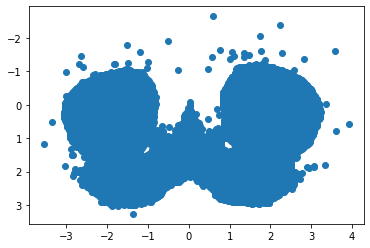

In [6]:
plotz = zlist[27]
print(plotz)

zidx = np.where( zz == plotz )
plotx = xx[zidx]
ploty = yy[zidx]

plt.scatter( plotx, ploty )
ax = plt.gca()
ax.invert_yaxis()
plt.show()


In [7]:
viz.close()